# Intervalo de confiança

## Breve resumo

- Intervalo de valores com probabilidade de conter o valor desconhecido


- Nível de confiança: número que exprime o grau de confiança deste intervalo  
        Ex: no nível de confiança de 95%, o risco de erro é de 5%

**Fórmula do IC**:


<div style="text-align: center; font-size: 20px;">
    $IC = \bar{x} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$
</div>

onde:

$\bar{x}$ = média da amostra

$z_{\alpha/2}$ = valor crítico associado ao nível de confiança (1 - α)

$\sigma$ = desvio padrão da amostra

$n$ = tamanho da amostra

- É necessário: média da amostra, desvio padrão, tamanho e nível de confiança


- Considerando o intervalo de confiança da média, temos também:



**Erro amostral (C)**:

<div style="text-align: center; font-size: 20px;">
    $C = Z \frac{\sigma}{\sqrt{n}}$
</div>
onde:

$Z$ = valor crítico associado ao nível de confiança

$\sigma$ = desvio padrão da população

$n$ = tamanho da amostra



**Z (normalização):**


<div style="text-align: center; font-size: 20px;">
    $Z = \frac{X - \mu}{\sigma}$
</div>


- Transformação dos dados
- Obter o valor crítico Z correspondente a um determinado nível de confiança
- Esse valor crítico é usado para determinar a margem de erro do intervalo de confiança

onde:

$Z$ = valor padronizado ou normalizado

$X$ = valor da variável

$\mu$ = média da população

$\sigma$ = desvio padrão da população



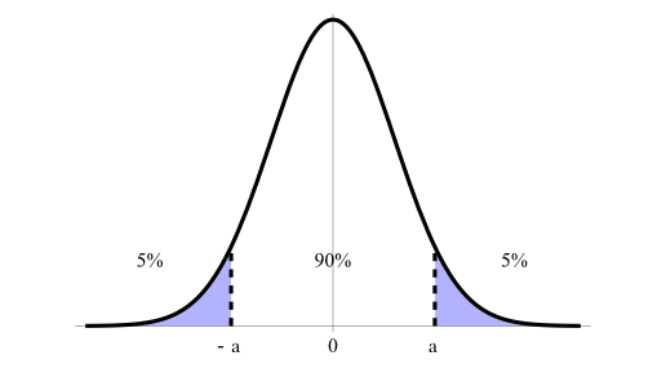

# Bibliotecas

In [1]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import math

import matplotlib.pyplot as plt
import scienceplots

# Implementação

OBS: Dados de altura.

In [2]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

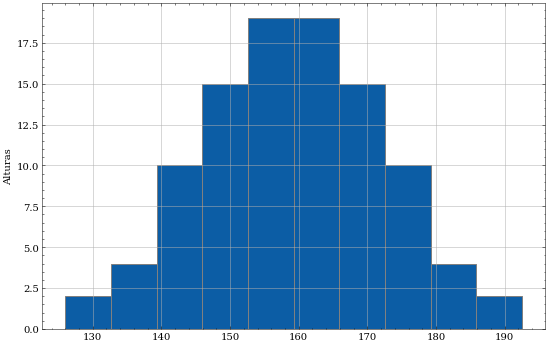

In [3]:
# Checando a distribuição dos dados

plt.rcParams['font.size'] = 15
plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(9,6))
plt.hist(dados, edgecolor='gray')
plt.ylabel('Alturas')
plt.grid(True)
plt.show();

### Colocando dados na fórmula

In [4]:
n = len(dados)
media = np.mean(dados)
desviop = np.std(dados)
alpha = 0.05 / 2 # 95% de confiança
z = norm.ppf(1 - alpha)

In [5]:
n, media, desviop, alpha, z

(100, 159.25, 13.65, 0.025, 1.959963984540054)

### Calculando intervalos

In [6]:
x_superior = media + z * (desviop / math.sqrt(n))
x_inferior = media - z * (desviop / math.sqrt(n))

In [7]:
x_inferior, media, x_superior

(156.57464916110283, 159.25, 161.92535083889717)

### Colocando a margem de erro amostral (C)

In [8]:
c = abs(media - x_superior)
c

2.675350838897174

In [9]:
# Obtendo os intervalos 

media - c, media + c

(156.57464916110283, 161.92535083889717)

# Implementação com o Scipy

In [10]:
stats.sem(dados) # σ / √n - erro padrão

1.3718766178288244

In [11]:
desviop / math.sqrt(n-1) # n-1 devido aos índices

1.3718766178288246

In [12]:
# nivel de confiança, media e σ/√n (erro padrão)

intervalos = norm.interval(0.95, media, stats.sem(dados))
intervalos 

(156.5611712378229, 161.9388287621771)

In [13]:
c = media - intervalos
c

array([ 2.68882876, -2.68882876])

# Testes com diferentes níveis de confiança

In [14]:
# 0.99

In [15]:
intervalos = norm.interval(0.99, media, stats.sem(dados))
intervalos

(155.71628000694295, 162.78371999305705)

In [16]:
margem_erro = media - intervalos
margem_erro

array([ 3.53371999, -3.53371999])

**OBS**: observar que com o nível de confiança maior, maior também a faixa de valores (intervalos mais abertos), indicando que os registros da população possuem mais chances de cair nesse intervalo do que no de um nível de confiança menor. Ainda nesse intuito, vê-se que a margem de erro é maior quando o nível de confiança também é maior. 

In [17]:
# 0.80

In [18]:
intervalos = norm.interval(0.80, media, stats.sem(dados))
intervalos

(157.49186937268743, 161.00813062731257)

In [19]:
margem_erro = media - intervalos
margem_erro

array([ 1.75813063, -1.75813063])